<a href="https://colab.research.google.com/github/LonelyFriday/Digits/blob/main/Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

# Digits Data

In [ ]:
data = load_digits()  ## load dataset
data.keys()  ## keys

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [ ]:
len(data.images)  ## total data in dataset

1797

In [ ]:
data.images[0]  ## 1st data from total 1,797 images

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

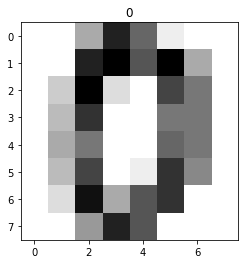

In [ ]:
plt.imshow(data.images[0], cmap= plt.cm.gray_r)  ## show the image of 1st data
plt.title(data.target[0])  ## show the target 
plt.show()

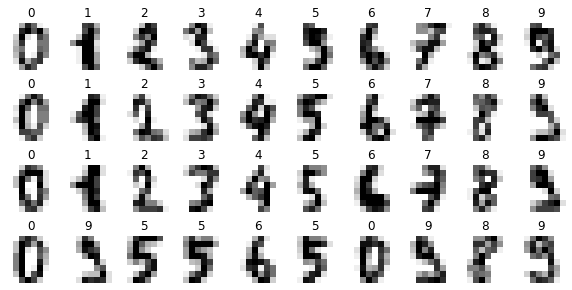

In [ ]:
## show first 40 images 
nplots = 40
plt.figure(figsize=(10, 5))

for n in range(nplots):
  plt.subplot(4, 10, n+1)
  plt.imshow(data.images[n], cmap='binary')
  plt.title(data.target[n])
  plt.axis('off')
plt.show()

# Format the data

In [ ]:
data.images.shape ## 1,797 images, first 8 is x-axis, second 8 is y-axis

(1797, 8, 8)

In [ ]:
X = data.images.reshape(len(data.images), -1) ## reshape the data
X.shape ## 1,797 row (images), 64 columns

(1797, 64)

In [ ]:
print('First data before reshape')
print(data.images[0]) ## show first data before reshape

print('\nFirst data after reshape')
print(X[0]) ## show the first data after reshape

First data before reshape
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

First data after reshape
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


# Train Test 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.2, random_state= 12) ## train 80% test 20% seed=12

# Model

In [ ]:
from sklearn import svm  ## we will use Support Vector Machine

In [ ]:
## create model 
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Evaluate

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_pred = model_svm.predict(X_test)  ## predict X_test by model

print('Predict from model:', y_pred[0:10])  ## print first 10 predicted data
print('Actury, it is:     ', y_test[0:10])  ## print first 10 actual data

Predict from model: [2 8 7 0 2 1 8 8 9 1]
Actury, it is:      [2 8 7 0 2 1 8 8 9 1]


In [ ]:
print(classification_report(y_test, y_pred))  ## classification report
print('Accuracy Score: {:.4}'.format(accuracy_score(y_test, y_pred)))  ## Accuracy score = 99.17% 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        43
           4       1.00      0.97      0.99        39
           5       1.00      0.94      0.97        34
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00        32
           9       0.92      1.00      0.96        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Accuracy Score: 0.9917


## Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred, labels= data.target_names))  ## confusion matrix: Row = Actual  Column = Predict

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  1]
 [ 0  0  0  0  0 32  0  0  0  2]
 [ 0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  0  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  0 34]]


<Figure size 2880x2880 with 0 Axes>

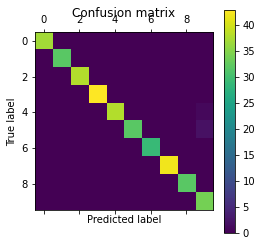

In [ ]:
plt.matshow(confusion_matrix(y_test, y_pred, labels= data.target_names))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Which data is wrong ?

In [ ]:
missing_index = np.where(y_pred != y_test)  ## wrong prediction

print('Mismatch:', missing_index)  ## location
print('\n Predict from model:', y_pred[missing_index])  ## prediction value
print('Actually, it is    ', y_test[missing_index])  ## Actual value

Mismatch: (array([161, 212, 213]),)

Predict from model: [9 9 9]
Actually, it is     [5 5 4]


## Let visualize the wrong prediction images

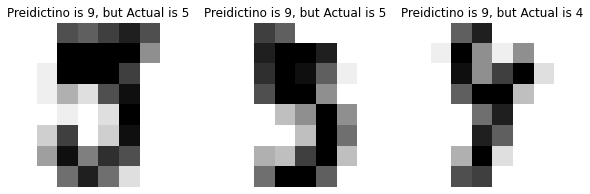

In [ ]:
plt.figure(figsize=(10,10))

for i in range(len(missing_index[0])):
  plt.subplot(1, 3, i+1)
  plt.imshow(X_test[missing_index][i].reshape(8, 8), cmap= plt.cm.gray_r)
  plt.title('Preidictino is {}, but Actual is {}'.format( y_pred[missing_index][i], y_test[missing_index][i]))
  plt.axis('off')
plt.show()